In [1]:
import numpy as np
from numpy import mean
from numpy import std
from numpy import dstack
from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import LSTM

import tensorflow as tf
from keras.layers import Conv1D
from keras.layers import MaxPooling1D, BatchNormalization
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot
import matplotlib.pyplot as plt
from keras.utils import plot_model
import keras
import zipfile
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import os
# set seed to reproduce similar results
np.random.seed(0)

In [2]:
from google.colab import drive   # 코랩 드라이브와 연동
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
Data_path= "/content/drive/MyDrive/gachon4-2/deeplearning/week4/UCI HAR Dataset"

In [23]:
df=read_csv("/content/drive/MyDrive/gachon4-2/deeplearning/week4/UCI HAR Dataset/train/Inertial Signals/total_acc_y_train.txt", header=None, delim_whitespace=True)

In [4]:
# load a single file as a numpy array
def load_file(filepath):
    dataframe = read_csv(filepath, header=None, delim_whitespace=True)
    return dataframe.values

# load a list of files and return as a 3d numpy array
def load_group(filenames, prefix=''):
	loaded = list()
	for name in filenames:
		data = load_file(prefix + name)
		loaded.append(data)
	# stack group so that features are the 3rd dimension
	loaded = dstack(loaded)
	return loaded

In [5]:
# load a dataset group, such as train or test
def load_dataset_group(group, prefix=''):
	filepath = os.path.join(prefix, group, 'Inertial Signals')
	# load all 9 files as a single array
	filenames = list()
	# total acceleration
	filenames += ['/total_acc_x_'+group+'.txt', '/total_acc_y_'+group+'.txt', '/total_acc_z_'+group+'.txt']
	# body acceleration
	filenames += ['/body_acc_x_'+group+'.txt', '/body_acc_y_'+group+'.txt', '/body_acc_z_'+group+'.txt']
	# body gyroscope
	filenames += ['/body_gyro_x_'+group+'.txt', '/body_gyro_y_'+group+'.txt', '/body_gyro_z_'+group+'.txt']
	# load input data
	X = load_group(filenames, filepath)
	# load class output
	y = load_file(os.path.join(prefix, group,'y_'+group+'.txt'))
	return X, y

In [6]:
# load the dataset, returns train and test X and y elements
def load_dataset():
    # load all train
    trainX, trainy = load_dataset_group('train',  Data_path)
    # load all test
    testX, testy = load_dataset_group('test', Data_path)
    # zero-offset class values
    trainy = trainy - 1
    testy = testy - 1
    # one hot encode y
    trainy = to_categorical(trainy)
    testy = to_categorical(testy)
    print("trainX shape: ",trainX.shape)
    print("trainy shape: ", trainy.shape)
    print("testX shape: ", testX.shape)
    print("testy shape: ", testy.shape)
    return trainX, trainy, testX, testy


In [7]:
trainX, trainy, testX, testy = load_dataset()

trainX shape:  (7352, 128, 9)
trainy shape:  (7352, 6)
testX shape:  (2947, 128, 9)
testy shape:  (2947, 6)


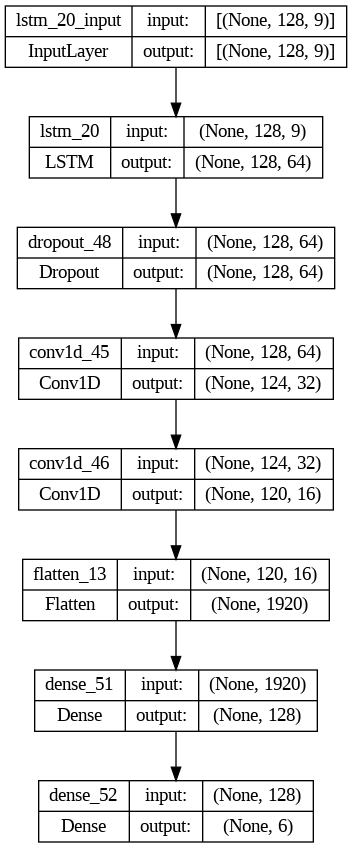

In [ ]:
n_timesteps, n_features, n_outputs = trainX.shape[1], trainX.shape[2], trainy.shape[1]
model = Sequential()
model.add(LSTM(64, return_sequences=True, kernel_initializer='he_normal', input_shape=(n_timesteps,n_features)))
model.add(Dropout(0.5))
# model.add(LSTM(32, return_sequences=True, kernel_initializer='he_normal', input_shape=(n_timesteps,n_features)))
# model.add(Dropout(0.5))
# model.add(LSTM(16, return_sequences=True, input_shape=(n_timesteps,n_features)))
# model.add(Dropout(0.5))

model.add(Conv1D(filters=32, kernel_size=5, activation='relu', input_shape=(n_timesteps,n_features)))
model.add(Conv1D(filters=16, kernel_size=5, activation='relu', input_shape=(n_timesteps,n_features)))

# model.add(Dropout(0.5))
# model.add(MaxPooling1D(pool_size=2))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))
plot_model(model, show_shapes=True, show_layer_names=True)

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
# fit network
train_epochs = 20
history = model.fit(trainX, trainy, epochs=train_epochs, batch_size=batch_size, verbose=True,  validation_split=validation_split, shuffle=True)


Epoch 1/20
92/92 [==============================] - 6s 19ms/step - loss: 0.5701 - accuracy: 0.7837 - val_loss: 0.6614 - val_accuracy: 0.8756
Epoch 2/20
92/92 [==============================] - 1s 9ms/step - loss: 0.1842 - accuracy: 0.9282 - val_loss: 0.6323 - val_accuracy: 0.8858
Epoch 3/20
92/92 [==============================] - 1s 9ms/step - loss: 0.1271 - accuracy: 0.9444 - val_loss: 0.7487 - val_accuracy: 0.9014
Epoch 4/20
92/92 [==============================] - 1s 9ms/step - loss: 0.0951 - accuracy: 0.9553 - val_loss: 0.7692 - val_accuracy: 0.8946
Epoch 5/20
92/92 [==============================] - 1s 10ms/step - loss: 0.0989 - accuracy: 0.9522 - val_loss: 0.8113 - val_accuracy: 0.8838
Epoch 6/20
92/92 [==============================] - 1s 14ms/step - loss: 0.0895 - accuracy: 0.9556 - val_loss: 0.8790 - val_accuracy: 0.8851
Epoch 7/20
92/92 [==============================] - 1s 14ms/step - loss: 0.0742 - accuracy: 0.9617 - val_loss: 1.0007 - val_accuracy: 0.9123
Epoch 8/20
92/92

[]

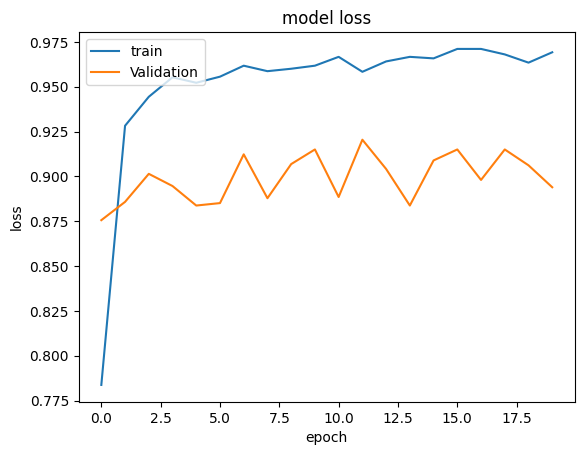

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')
plt.plot()

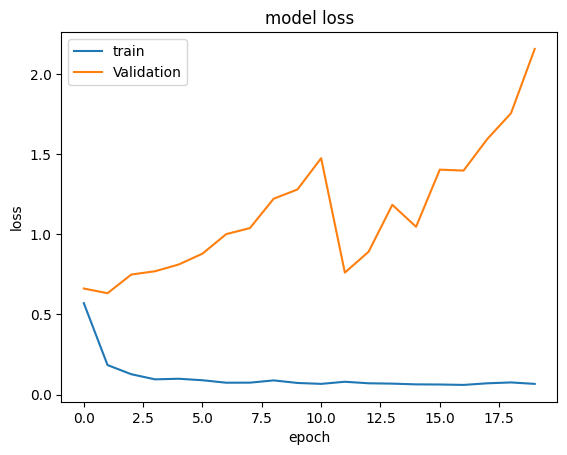

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')


In [ ]:
# evaluate model
test_loss, test_accuracy = model.evaluate(testX, testy, batch_size=batch_size, verbose=0)
print("Accuracy of the CNN model", test_accuracy)
predictions=model.predict(testX)


Accuracy of the CNN model 0.8917543292045593
93/93 [==============================] - 1s 4ms/step


**** Confusion Matrix ****
[[460  17  19   0   0   0]
 [ 20 439  12   0   0   0]
 [  0  12 408   0   0   0]
 [  0  27   0 417  47   0]
 [  2   5   0 115 410   0]
 [  0  43   0   0   0 494]]
**** Classification Report ****
              precision    recall  f1-score   support

           1       0.95      0.93      0.94       496
           2       0.81      0.93      0.87       471
           3       0.93      0.97      0.95       420
           4       0.78      0.85      0.82       491
           5       0.90      0.77      0.83       532
           6       1.00      0.92      0.96       537

    accuracy                           0.89      2947
   macro avg       0.90      0.90      0.89      2947
weighted avg       0.90      0.89      0.89      2947



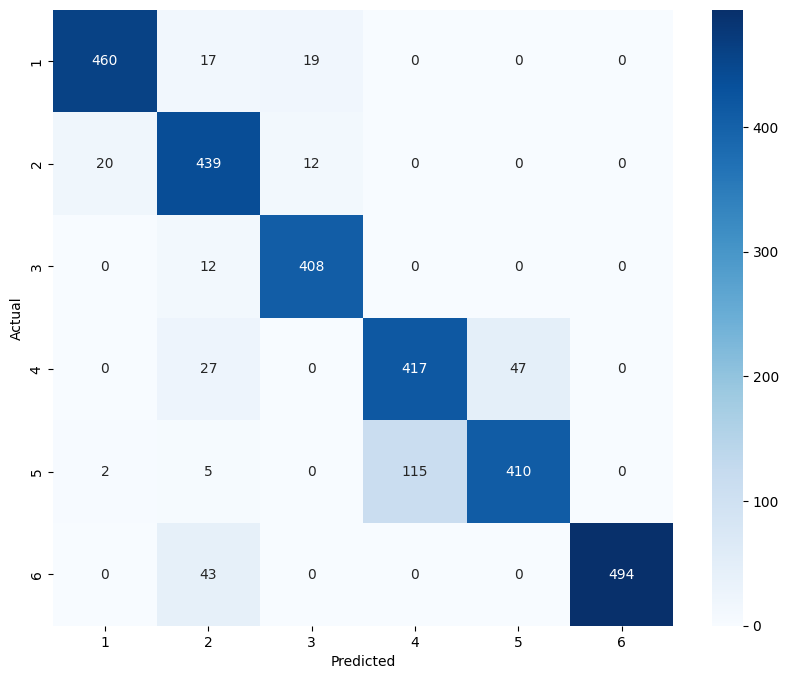

In [ ]:
display_results(testy,predictions,classNames)
